<a href="https://colab.research.google.com/github/taitip-supha/DeepLearn-Keras/blob/main/01_MLP/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Prepare the Environment

In [ ]:
#Check GPU avalible
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-d7db9dad-87e6-4647-e087-628ad012e408)


In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
print(f"Python :{sys.version}\nNumpy:{np.__version__}\nTensorFlow{tf.__version__}")
print(f"tf.keras.backend.image_data_firmat() = {tf.keras.backend.image_data_format()}")
#Count the number ofGPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print(f"TensorFlow detect {len(gpus)} GPUs")
for i,gpu in enumerate(gpus):
  print(f"> GPU No. {i} : Name = {gpu.name}  ,Type = {gpu.device_type}")

Python :3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Numpy:1.19.5
TensorFlow2.7.0
tf.keras.backend.image_data_firmat() = channels_last
TensorFlow detect 1 GPUs
> GPU No. 0 : Name = /physical_device:GPU:0  ,Type = GPU


In [ ]:
#Set seed value for reproducability during experiments Skilp this cell if random initialization (with varied result) is needed
np.random.seed(1234)
tf.random.set_seed(5678)

# 2. Prepare data in Numpy

Suppose that thsi example deals with the single-label multi-class classification problem where a single input is a 1D vector of shape (100,) and there are 10 predefined classes of out put
</br>1. Load train and test data
</br>2. Data prepocessing
</br>3.Format the data (e.g. shape, dtype) to suit with the model's requirement (e.g. MLP)

In [ ]:
input_dim = 100 #the number of features per one input
output_din = 10 #the number of output classes

In [ ]:
#Load Train data
n_train = 10000
x_train = np.random.randn( n_train ,input_dim)
y_train = np.random.randint(0, output_din, size=(n_train,))
print( f" x_train.shape={x_train.shape}, x_train.dtype={x_train.dtype}, min(x_train)={np.min(x_train):0.4f}, max(x_train)={np.max(x_train):0.4f}")
print( f" y_train.shape={y_train.shape}, y_train.dtype={y_train.dtype}, min(y_train)={np.min(y_train)}, max(y_train)={np.max(y_train)}")


 x_train.shape=(10000, 100), x_train.dtype=float64, min(x_train)=-4.7506, max(x_train)=5.0293
 y_train.shape=(10000,), y_train.dtype=int64, min(y_train)=0, max(y_train)=9


In [ ]:
#Load Test Data 
n_test = 2000
x_test = np.random.randn(n_test , input_dim)
y_test = np.random.randint(0, output_din ,size=(n_test,))
print( f" x_test.shape={x_test.shape}, x_test.dtype={x_test.dtype}, min(x_test)={np.min(x_test):0.4f}, max(x_test)={np.max(x_test):0.4f}")
print( f" y_test.shape={y_test.shape}, y_test.dtype={y_test.dtype}, min(y_test)={np.min(y_test)}, max(y_test)={np.max(y_test)}")

 x_test.shape=(2000, 100), x_test.dtype=float64, min(x_test)=-4.9507, max(x_test)=5.0538
 y_test.shape=(2000,), y_test.dtype=int64, min(y_test)=0, max(y_test)=9


In [ ]:
#Data processing
pass

In [ ]:
# Data format shape the dense layer of MLP expects the input of shape (n_samples, n_features)
pass

In [ ]:
# Data foramt dtype : Most DL Fameworks use float32 as a default data type
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
print( f" x_train.shape={x_train.shape}, x_train.dtype={x_train.dtype}, min(x_train)={np.min(x_train):0.4f}, max(x_train)={np.max(x_train):0.4f}")
print( f" x_test.shape={x_test.shape}, x_test.dtype={x_test.dtype}, min(x_test)={np.min(x_test):0.4f}, max(x_test)={np.max(x_test):0.4f}")

 x_train.shape=(10000, 100), x_train.dtype=float32, min(x_train)=-4.7506, max(x_train)=5.0293
 x_test.shape=(2000, 100), x_test.dtype=float32, min(x_test)=-4.9507, max(x_test)=5.0538


#3. Create the network architecture

In [ ]:
model = tf.keras.models.Sequential()

#Input layer
model.add(tf.keras.Input(shape=(input_dim,)))

#Hidden layer
model.add(tf.keras.layers.Dense(32, activation='relu', name='hidden1')) #use defult weight initialization, don't use any regularization
model.add(tf.keras.layers.BatchNormalization(axis =-1, name='bn1'))

model.add(tf.keras.layers.Dense(64, activation='relu', name='hidden2')) #use defult weight initialization, don't use any regularization
model.add(tf.keras.layers.BatchNormalization(axis =-1, name='bn2'))

model.add(tf.keras.layers.Dense(32, activation='relu', name='hidden3')) #use defult weight initialization, don't use any regularization
model.add(tf.keras.layers.Dropout(0.3 ,name='do3'))

#output layer
model.add(tf.keras.layers.Dense(output_din, activation='softmax', name='output'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 32)                3232      
                                                                 
 bn1 (BatchNormalization)    (None, 32)                128       
                                                                 
 hidden2 (Dense)             (None, 64)                2112      
                                                                 
 bn2 (BatchNormalization)    (None, 64)                256       
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 do3 (Dropout)               (None, 32)                0         
                                                                 
 output (Dense)              (None, 10)               

# 4. Compile the model

Examples of compiling the model (only run one cell provided below)

In [ ]:
#1) complie with default values for both optimizer and loss
model.compile( optimizer='adam', loss='sparse_categorical_croseentropy', metrics=['acc'])


In [ ]:
#2) complie + Hyperparameter tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['acc'])

# 5. Train the model on train set

In [ ]:
checkpoint_filepath = "bestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, 
                                                               save_weights_only=True, 
                                                               monitor='val_acc', 
                                                               model='max', 
                                                               save_best_only=True)
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2, callbacks=[model_checkpoint_callback])

Epoch 1/20
63/63 [==============================] - 3s 8ms/step - loss: 2.6109 - acc: 0.1007 - val_loss: 2.3362 - val_acc: 0.0985
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 2.4010 - acc: 0.1140 - val_loss: 2.3309 - val_acc: 0.0965
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 2.3314 - acc: 0.1289 - val_loss: 2.3318 - val_acc: 0.0960
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 2.2950 - acc: 0.1421 - val_loss: 2.3339 - val_acc: 0.0920
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 2.2807 - acc: 0.1420 - val_loss: 2.3360 - val_acc: 0.0865
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 2.2626 - acc: 0.1546 - val_loss: 2.3380 - val_acc: 0.0870
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 2.2484 - acc: 0.1666 - val_loss: 2.3420 - val_acc: 0.0895
Epoch 8/20
63/63 [==============================] - 0s 4ms/step - loss: 2.2394 - acc: 0.16

In [ ]:
#Inspect the save file (sorted by modification date,  newest first)
!ls -lt

total 124
-rw-r--r-- 1 root root 58352 Jan 22 16:09 bestmodel_epoch12_valloss2.36.hdf5
-rw-r--r-- 1 root root 58352 Jan 22 16:09 bestmodel_epoch01_valloss2.34.hdf5
drwxr-xr-x 1 root root  4096 Jan  7 14:33 sample_data


In [ ]:
# check the keys in history
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

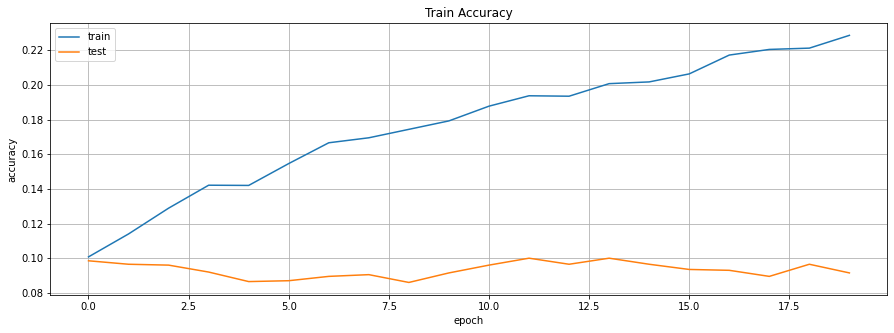

In [ ]:
#summary history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'] ,loc='upper left')
plt.grid()
plt.show()

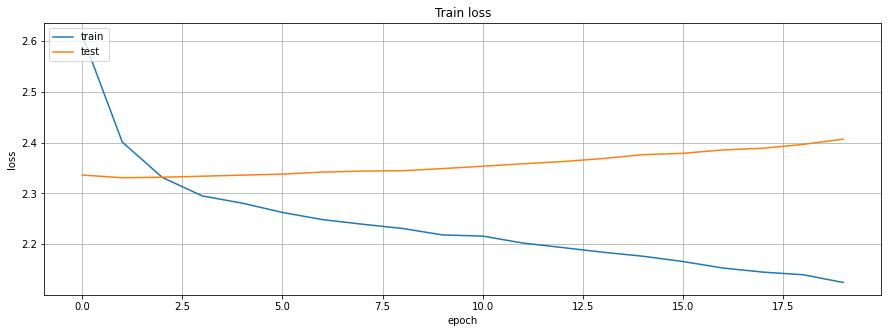

In [ ]:
#summary history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'] ,loc='upper left')
plt.grid()
plt.show()

# 6. Evaluate the model on test set

In [ ]:
results = model.evaluate(x_test, y_test, batch_size=128)
print(f"{model.metrics_names} = {results}")

16/16 [==============================] - 0s 2ms/step - loss: 2.3979 - acc: 0.0960
['loss', 'acc'] = [2.397862195968628, 0.09600000083446503]


# 7. Inference

In [ ]:
#Test using the model on x_test[i]
i = 10
y_pred = model.predict(x_test[i].reshape(1,-1)) #Reshape x_test[i] form (n_festure, ) to (1,n_feature)

print( f"{'#'*10} Input: x_test[{i}] {'#'*10}")
print(f"raw shape={x_test[i].shape} ==> reshape to {x_test[i].reshape(1,-1).shape}\nvalue={x_test[i]}\n")

print( f"{'#'*10} Ground truth: y_test[{i}] {'#'*10}")
print(f"shape={y_test[i].shape}\nvalue={y_test[i]}\n")

print( f"{'#'*10} Prediction : y_pred {'#'*10}")
print( f"type={type(y_pred)}\ndtype]{y_pred.dtype}\nshape={y_pred.shape}")
print(f"value={y_pred}")
print(f"np.argmax(y_pred)={np.argmax(y_pred)}")

########## Input: x_test[10] ##########
raw shape=(100,) ==> reshape to (1, 100)
value=[-3.17959    -0.4369528   0.45370507  0.44151968  0.42437708  0.5261006
 -0.7363777   0.04711348  0.9378339  -1.3076552  -1.1024182   0.39609203
  1.6338706  -1.6935779   1.7982523   0.6223167   0.6903476   0.22950219
  1.3453071   1.1830628  -1.1431582  -0.3056663   1.2948122   0.06094379
 -0.44923595  0.31557265 -0.56754756  0.73481154  0.9224857  -0.36599284
 -0.40705913 -2.1895294  -0.05458339  1.8822081  -1.4580902   0.28339493
 -1.529695    0.16146515 -0.2206541   0.29314342  0.42341274 -0.4509745
  0.259185    0.8984846  -0.4252893  -0.39286062 -0.64844704  1.0119461
  0.43550205 -1.2437229  -0.46353015 -0.17078814 -0.16154137  0.21251133
  0.5162162  -0.7536175  -1.0652348  -0.3495668   0.46527943 -0.8619703
  0.19397739 -0.15483662 -0.69352365  2.3104594   0.8417036   0.6903964
  0.46132287  0.66172427  3.538146   -1.5660497  -0.8713355   0.48834962
 -0.06055452  0.43200922  0.97029334 -0.01

# My Network

In [ ]:
mymodel = tf.keras.models.Sequential()

#Input layer
mymodel.add(tf.keras.Input(shape=(input_dim,)))

#Hidden layer
mymodel.add(tf.keras.layers.Dense(128, activation='relu', name='hidden1')) #use defult weight initialization, don't use any regularization
mymodel.add(tf.keras.layers.BatchNormalization(axis =-1, name='bn1'))

mymodel.add(tf.keras.layers.Dense(64, activation='relu', name='hidden2')) #use defult weight initialization, don't use any regularization
mymodel.add(tf.keras.layers.Dropout(0.3 ,name='do2'))

mymodel.add(tf.keras.layers.Dense(32, activation='relu', name='hidden3')) #use defult weight initialization, don't use any regularization
mymodel.add(tf.keras.layers.Dropout(0.3 ,name='do3'))

mymodel.add(tf.keras.layers.Dense(32, activation='relu', name='hidden4')) #use defult weight initialization, don't use any regularization
mymodel.add(tf.keras.layers.BatchNormalization(axis =-1, name='bn4'))

#output layer
mymodel.add(tf.keras.layers.Dense(output_din, activation='softmax', name='output'))

mymodel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 128)               12928     
                                                                 
 bn1 (BatchNormalization)    (None, 128)               512       
                                                                 
 hidden2 (Dense)             (None, 64)                8256      
                                                                 
 do2 (Dropout)               (None, 64)                0         
                                                                 
 hidden3 (Dense)             (None, 32)                2080      
                                                                 
 do3 (Dropout)               (None, 32)                0         
                                                                 
 hidden4 (Dense)             (None, 32)               

In [ ]:
#complie + Hyperparameter tuning
mymodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['acc'])

In [ ]:
#Train the model
mycheckpoint_filepath = "mybestmodel_epoch{epoch:02d}_valloss{val_loss:.2f}.hdf5"
mymodel_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=mycheckpoint_filepath, 
                                                               save_weights_only=True, 
                                                               monitor='val_acc', 
                                                               model='max', 
                                                               save_best_only=True)
myhistory = mymodel.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2, callbacks=[mymodel_checkpoint_callback])

Epoch 1/20
63/63 [==============================] - 0s 6ms/step - loss: 1.6268 - acc: 0.4215 - val_loss: 3.3375 - val_acc: 0.0925
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5975 - acc: 0.4336 - val_loss: 3.3329 - val_acc: 0.0910
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5893 - acc: 0.4276 - val_loss: 3.3825 - val_acc: 0.0875
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 1.5718 - acc: 0.4401 - val_loss: 3.4319 - val_acc: 0.1010
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5411 - acc: 0.4544 - val_loss: 3.4867 - val_acc: 0.0965
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5277 - acc: 0.4554 - val_loss: 3.4893 - val_acc: 0.0995
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5194 - acc: 0.4579 - val_loss: 3.5110 - val_acc: 0.0910
Epoch 8/20
63/63 [==============================] - 0s 5ms/step - loss: 1.5054 - acc: 0.47

In [ ]:
#Inspect the save file (sorted by modification date,  newest first)
!ls -lt

total 1824
-rw-r--r-- 1 root root 131496 Jan 22 16:56 mybestmodel_epoch04_valloss2.31.hdf5
-rw-r--r-- 1 root root 131496 Jan 22 16:56 mybestmodel_epoch02_valloss2.31.hdf5
-rw-r--r-- 1 root root 131496 Jan 22 16:56 mybestmodel_epoch01_valloss2.31.hdf5
-rw-r--r-- 1 root root  81928 Jan 22 16:54 mybestmodel_epoch03_valloss2.31.hdf5
-rw-r--r-- 1 root root  81928 Jan 22 16:54 mybestmodel_epoch02_valloss2.32.hdf5
-rw-r--r-- 1 root root  81928 Jan 22 16:54 mybestmodel_epoch01_valloss2.32.hdf5
-rw-r--r-- 1 root root  45736 Jan 22 16:52 mybestmodel_epoch07_valloss2.35.hdf5
-rw-r--r-- 1 root root  45736 Jan 22 16:52 mybestmodel_epoch05_valloss2.35.hdf5
-rw-r--r-- 1 root root  45736 Jan 22 16:52 mybestmodel_epoch01_valloss2.35.hdf5
-rw-r--r-- 1 root root  45736 Jan 22 16:51 mybestmodel_epoch23_valloss2.35.hdf5
-rw-r--r-- 1 root root  45736 Jan 22 16:51 mybestmodel_epoch22_valloss2.34.hdf5
-rw-r--r-- 1 root root  45736 Jan 22 16:51 mybestmodel_epoch06_valloss2.32.hdf5
-rw-r--r-- 1 root root  45736

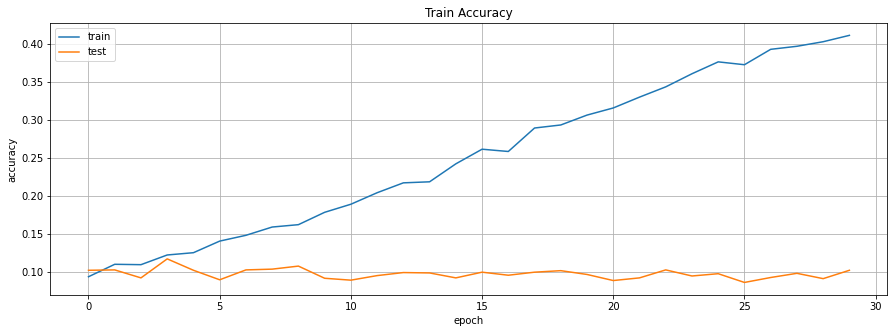

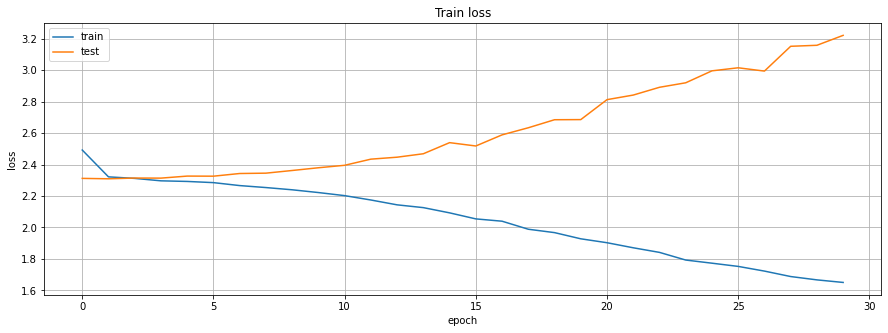

In [ ]:
#summary history for accuracy
plt.figure(figsize=(15,5))
plt.plot(myhistory.history['acc'])
plt.plot(myhistory.history['val_acc'])
plt.title('Train Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'] ,loc='upper left')
plt.grid()
plt.show()

#summary history for loss
plt.figure(figsize=(15,5))
plt.plot(myhistory.history['loss'])
plt.plot(myhistory.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'] ,loc='upper left')
plt.grid()
plt.show()

In [ ]:
#Evaluate
myresults = mymodel.evaluate(x_test, y_test, batch_size=128)
print(f"{mymodel.metrics_names} = {myresults}")

16/16 [==============================] - 0s 2ms/step - loss: 2.5986 - acc: 0.1065
['loss', 'acc'] = [2.5986335277557373, 0.10649999976158142]


In [ ]:
#Test using the model on x_test[i]
i = 10
y_pred = mymodel.predict(x_test[i].reshape(1,-1)) #Reshape x_test[i] form (n_festure, ) to (1,n_feature)

print( f"{'#'*10} Input: x_test[{i}] {'#'*10}")
print(f"raw shape={x_test[i].shape} ==> reshape to {x_test[i].reshape(1,-1).shape}\nvalue={x_test[i]}\n")

print( f"{'#'*10} Ground truth: y_test[{i}] {'#'*10}")
print(f"shape={y_test[i].shape}\nvalue={y_test[i]}\n")

print( f"{'#'*10} Prediction : y_pred {'#'*10}")
print( f"type={type(y_pred)}\ndtype]{y_pred.dtype}\nshape={y_pred.shape}")
print(f"value={y_pred}")
print(f"np.argmax(y_pred)={np.argmax(y_pred)}")

########## Input: x_test[10] ##########
raw shape=(100,) ==> reshape to (1, 100)
value=[-3.17959    -0.4369528   0.45370507  0.44151968  0.42437708  0.5261006
 -0.7363777   0.04711348  0.9378339  -1.3076552  -1.1024182   0.39609203
  1.6338706  -1.6935779   1.7982523   0.6223167   0.6903476   0.22950219
  1.3453071   1.1830628  -1.1431582  -0.3056663   1.2948122   0.06094379
 -0.44923595  0.31557265 -0.56754756  0.73481154  0.9224857  -0.36599284
 -0.40705913 -2.1895294  -0.05458339  1.8822081  -1.4580902   0.28339493
 -1.529695    0.16146515 -0.2206541   0.29314342  0.42341274 -0.4509745
  0.259185    0.8984846  -0.4252893  -0.39286062 -0.64844704  1.0119461
  0.43550205 -1.2437229  -0.46353015 -0.17078814 -0.16154137  0.21251133
  0.5162162  -0.7536175  -1.0652348  -0.3495668   0.46527943 -0.8619703
  0.19397739 -0.15483662 -0.69352365  2.3104594   0.8417036   0.6903964
  0.46132287  0.66172427  3.538146   -1.5660497  -0.8713355   0.48834962
 -0.06055452  0.43200922  0.97029334 -0.01